In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Импортировал и прочитал первых 7 пассажиров
df = pd.read_csv('C:/Users/wwwpo/Documents/titanic/train.csv')
df[:7]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [3]:
df.isnull().sum()#Kол-во пропущенных значений

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df = df.drop(columns= ['Name', 'Ticket', 'Cabin','Embarked'])#Удалил колонки, которые не несут смысловой нагрузки

In [5]:
df['Age'].fillna(df['Age'].median(skipna = True),inplace = True)#Заполнил пропущенное значение по МЕДИАНЕ(середина значений)

In [6]:
df.info() #Проверил данные после заполнения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


C:\Users\wwwpo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


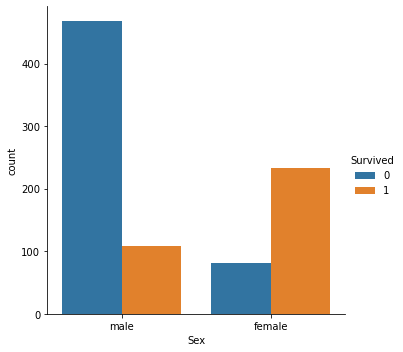

In [7]:
sns.catplot('Sex', data = df, hue = 'Survived', kind = 'count')#Мужчин, хоть, их и больше, но выжило их намного меньше

C:\Users\wwwpo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


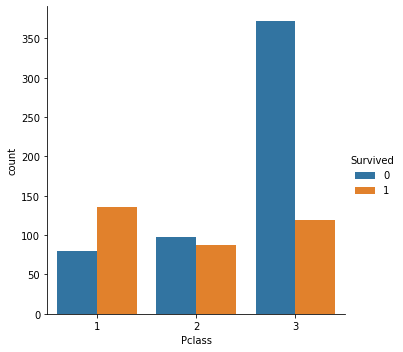

In [8]:
sns.catplot('Pclass', data = df, hue = 'Survived', kind = 'count')#Так же, богатые выживают чаще(выгодно быть богатым)

C:\Users\wwwpo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


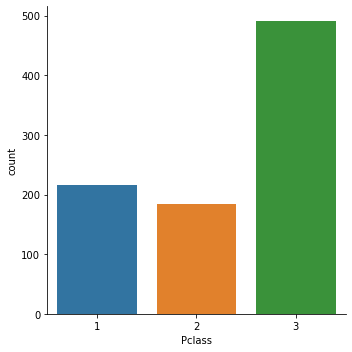

In [9]:
sns.catplot('Pclass', data = df, kind = 'count')#На предыдущем графике видно, что погиблo множество пассажиров с низким достатком, а на этом граффике заметил, что бедных было изначально значительно больше

C:\Users\wwwpo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


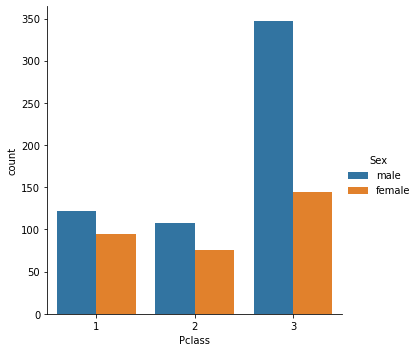

In [10]:
sns.catplot('Pclass', data = df, hue = 'Sex', kind = 'count')# Бедных мужчин было больше

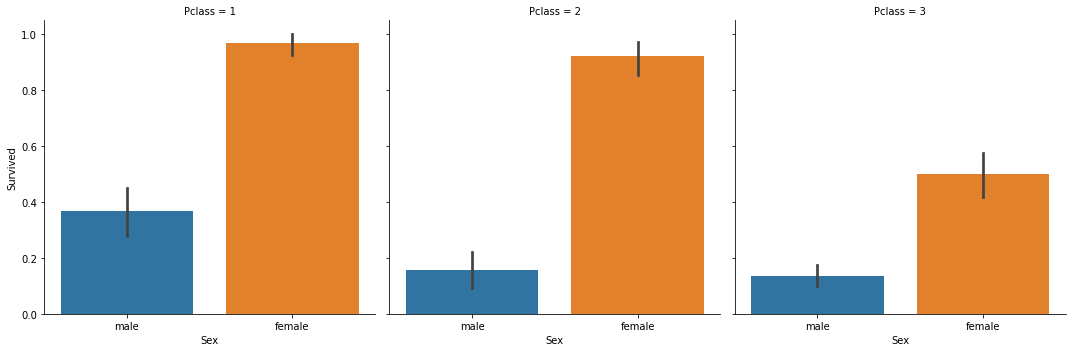

In [11]:
sns.catplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df, kind = 'bar')#Выживших бедных мужчин было меньше всего

C:\Users\wwwpo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


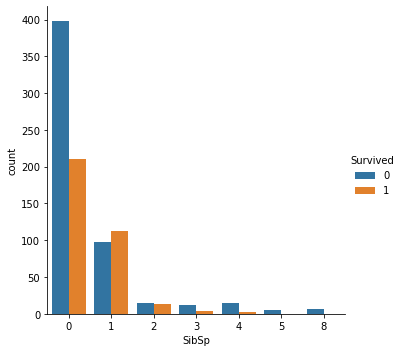

In [12]:
sns.catplot('SibSp', data = df, hue = 'Survived', kind = 'count')#Выживаемость зависит и ои кол-во РОДСТВЕННИКОВ на борту

C:\Users\wwwpo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


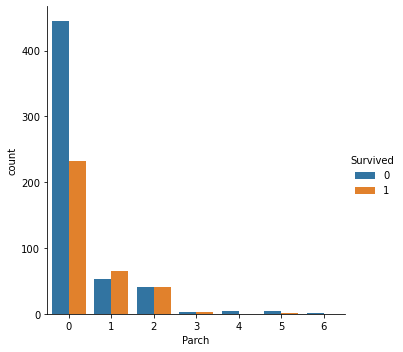

In [13]:
sns.catplot('Parch', data = df, hue = 'Survived', kind = 'count')#Выживаемость зависит и ои кол-во ДЕТЕЙ на борту

In [14]:
#Заметив, что от кол-во родственников и кол-ко детей зависит выживаемость, объединю значения
df['Family'] = df['SibSp'] + df['Parch']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,1
4,5,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0
887,888,1,1,female,19.0,0,0,30.0000,0
888,889,0,3,female,28.0,1,2,23.4500,3
889,890,1,1,male,26.0,0,0,30.0000,0


C:\Users\wwwpo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


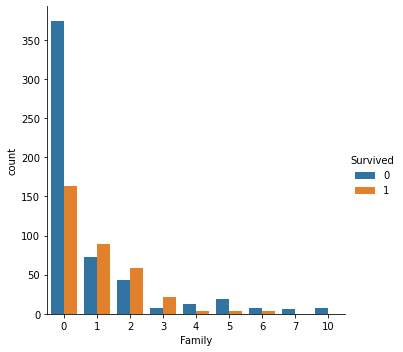

In [15]:
sns.catplot('Family', data = df, hue = 'Survived', kind = 'count')#Объединение помогло лучше определить случаи, в которых люди выживали

C:\Users\wwwpo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


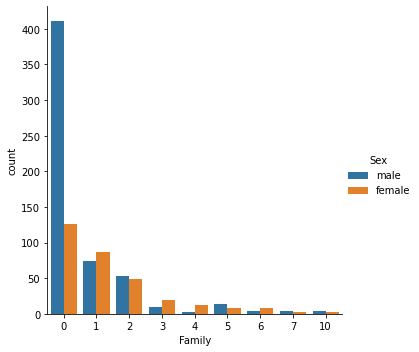

In [16]:
sns.catplot('Family', data = df, hue = 'Sex', kind = 'count')#При численности от 1 до 3 членов семьи чаще выживали женщины

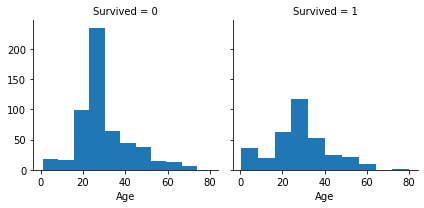

In [19]:
g = sns.FacetGrid(df, col='Survived')#Выживаемость и смертность относительно возраста
g.map(plt.hist, 'Age', bins=10)

In [20]:
df= pd.get_dummies(df)#Значения в колонке 'Sex' кодируем в виде ЧИСЛОВЫХ переменных, т.к. 
#метод FIT не может работать со строковыми индификаторами

In [21]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,1,0
888,889,0,3,28.0,1,2,23.4500,3,1,0
889,890,1,1,26.0,0,0,30.0000,0,0,1


In [23]:
from sklearn import tree

In [24]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [25]:
X = df.drop(columns = ['Survived'])
y = df.Survived

In [26]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)# Разбил значения 1/3, где 0.33% тестовая выборка

In [29]:
X_train.shape

(596, 9)

In [30]:
X_test.shape

(295, 9)

In [39]:
clf.score(X,y)#Предсказывает число правильных ответов на основе работы вопросов у дерева

0.8383838383838383

In [40]:
clf.fit(X_train,y_train)#Обучил классификатор на train

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [41]:
clf.score(X_train,y_train)#Точность классификации на обучающем множестве

0.8456375838926175

In [42]:
clf.score(X_test,y_test)#Точность классификации на тестовом множестве

0.823728813559322

In [43]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=5)#ограичил кол-во вопросов(глубину) дерева

In [44]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [45]:
clf.score(X_train,y_train)#Точность классификации на обучающем множестве

0.8456375838926175

In [38]:
clf.score(X_test,y_test)#Точность классификации на тестовом множестве

0.823728813559322